# Email parsing and Classification  (Case Study #3: DS7331)
SMU Student collaboration:

 - Allen Miller
 - Vijay Kaniti
 - Venkata 'MG' Vanga

In [1]:
import os
import re

In [2]:
import numpy as np
import pandas as pd
import email
from html.parser import HTMLParser
from bs4 import BeautifulSoup

Checking all the directories in the folder of jupiter notebook.

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'CS#3_Email parsing and Spam Classification_Miller,Kaniti,Vanga.ipynb',
 'easy_ham',
 'easy_ham_2',
 'hard_ham',
 'spam',
 'spam_2']

Separating to see how many files and directries are there.

In [4]:
basepath = '.'
for fname in os.listdir(basepath):
    path = os.path.join(basepath, fname)
    if os.path.isdir(path):
        continue
    else:
        print(fname)

CS#3_Email parsing and Spam Classification_Miller,Kaniti,Vanga.ipynb


In [5]:
files = [f for f in os.listdir('.') if (re.match(r'easy', f)) or (re.match(r'hard', f)) or (re.match(r'spam', f))]
files

['easy_ham', 'easy_ham_2', 'hard_ham', 'spam', 'spam_2']

In [6]:
DIR = []
for i in range(len(files)):
    DIR = files[i]
    print(DIR,':',len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

easy_ham : 5052
easy_ham_2 : 1401
hard_ham : 501
spam : 1001
spam_2 : 1398


Creating function for stripping the header test.

In [7]:
def strip_head(text):
    tmp=[]
    flag = False
    for i in text:
        if i=='':
            flag = True
        if flag == True:
            tmp.append(i)
    return tmp

Creating function for multipart/text email parsing.

In [8]:
def return_text(mail):
    if mail.is_multipart():
        tmp = mail.get_payload()[0]
        return return_text(tmp)
    elif mail.is_multipart() == False:
        return mail

'easy_ham' parsing

In [9]:
targets = []
data = []
count = 0
not_spamList = os.listdir("./easy_ham/")
for i in not_spamList:
    with open("./easy_ham/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = return_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data.append(tmp)
        targets.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data.append(tmp)
        targets.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham:',len(data))
print('Number of targets for easy_ham:',len(targets))
        

Number of emails parsed in easy_ham: 5052
Number of targets for easy_ham: 5052


'easy_ham_2' parsing

In [10]:
not_spamList1 = os.listdir("./easy_ham_2/")
for i in not_spamList1:
    with open("./easy_ham_2/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = return_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace("-"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham + easy_ham_2:',len(data))
print('Number of targets for easy_ham + easy_ham_2:',len(targets))

Number of emails parsed in easy_ham + easy_ham_2: 6453
Number of targets for easy_ham + easy_ham_2: 6453


'hard_ham' parsing

In [11]:
not_spamList2 = os.listdir("./hard_ham/")
for i in not_spamList2:
    with open("./hard_ham/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = return_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace("-"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Number of emails parsed in easy_ham + easy_ham_2 + hard_ham:',len(data))
print('Number of targets for easy_ham + easy_ham_2 + hard_ham:',len(targets))

Number of emails parsed in easy_ham + easy_ham_2 + hard_ham: 6954
Number of targets for easy_ham + easy_ham_2 + hard_ham: 6954


'spam' parsing

In [12]:
spamList = os.listdir("./spam/")
for i in spamList:
    with open("./spam/"+i, "r", encoding = 'utf-8' or 'us-ascii' or 'windows-1252' or 'iso-8859-1', errors='ignore') as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    x = return_text(x)
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace("-"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(1)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(1)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)
print('Number of emails parsed in easy_ham + easy_ham_2 + hard_ham + spam:',len(data))
print('Number of targets for easy_ham + easy_ham_2 + hard_ham + spam:',len(targets))

msg 00467.5b733c506b7165424a0d4a298e67970f not parsed
multipart/alternative
None
msg 0478.16f274ffd3e884a574c9461012cadea6 not parsed
multipart/alternative
None
Number of emails parsed in easy_ham + easy_ham_2 + hard_ham + spam: 7953
Number of targets for easy_ham + easy_ham_2 + hard_ham + spam: 7953


'spam_2' parsing

In [13]:
spamList1 = os.listdir("./spam_2/")
for i in spamList1:
    with open("./spam_2/"+i, "r", encoding = 'utf-8' or 'us-ascii' or 'windows-1252' or 'iso-8859-1', errors='ignore') as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    x = return_text(x)
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace("-"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(1)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        data.append(tmp)
        targets.append(1)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)
print('Number of emails parsed in easy_ham + easy_ham_2 + hard_ham + spam_2:',len(data))
print('Number of targets for easy_ham + easy_ham_2 + hard_ham + spam_2:',len(targets))

msg 00204.4cf15f97b8ea08bfafab7d5091b8fbe7 not parsed
text/plain charset=us-ascii
None
msg 01214.973b4598b630a989967ff69b19f95d4a not parsed
multipart/alternative
None
Number of emails parsed in easy_ham + easy_ham_2 + hard_ham + spam_2: 9349
Number of targets for easy_ham + easy_ham_2 + hard_ham + spam_2: 9349


In [14]:
print(len(data))

9349


In [15]:
len(data) == len(targets)

True

In [16]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopset = set(stopwords.words('english'))
def remove_stopwords(dt):
    output_array=[]
    for sen in dt:
        temp_list=[]
        for word in sen.split():
            if word.lower() not in stopset:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

a = remove_stopwords(data)
print("data",len(data))
print("a",len(a))

data 9349
a 9349


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, targets,test_size=0.35, shuffle=True, random_state=42)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()
cv_data_train = cv.fit_transform(X_train)
cv_data_test = cv.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [21]:
model.fit(cv_data_train, y_train)

MultinomialNB()

In [22]:
cv_preds = model.predict(cv_data_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(cv_preds, y_test)

0.9783073632752826

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,cv_preds,target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.99      2437
        Spam       1.00      0.92      0.96       836

    accuracy                           0.98      3273
   macro avg       0.98      0.96      0.97      3273
weighted avg       0.98      0.98      0.98      3273



<function matplotlib.pyplot.show(close=None, block=None)>

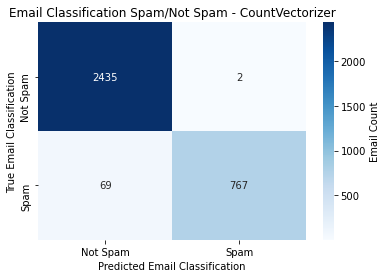

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm0 = confusion_matrix(y_test,cv_preds)
x_axis_labels = ['Not Spam', 'Spam']
y_axis_labels = ['Not Spam', 'Spam']
ax = plt.axes()
sns.heatmap(cm0, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Email Count',})
ax.set_title('Email Classification Spam/Not Spam - CountVectorizer')
plt.xlabel("Predicted Email Classification")
plt.ylabel("True Email Classification") 
plt.show

#### TFIDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [28]:
tf_data_train = tfidf.fit_transform(X_train)

tf_data_test = tfidf.transform(X_test)

In [29]:
y_train = np.array(y_train)

In [30]:
y_test = np.array(y_test)

In [31]:
model.fit(tf_data_train, y_train)

MultinomialNB()

In [32]:
preds = model.predict(tf_data_test)

In [33]:
accuracy_score(preds, y_test)

0.8927589367552704

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds,target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.87      1.00      0.93      2437
        Spam       1.00      0.58      0.73       836

    accuracy                           0.89      3273
   macro avg       0.94      0.79      0.83      3273
weighted avg       0.91      0.89      0.88      3273



<function matplotlib.pyplot.show(close=None, block=None)>

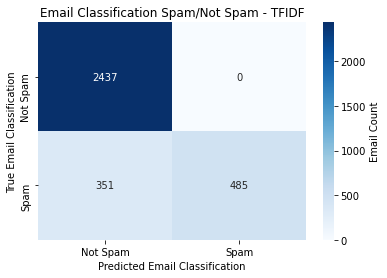

In [35]:
cm0 = confusion_matrix(y_test,preds)
x_axis_labels = ['Not Spam', 'Spam']
y_axis_labels = ['Not Spam', 'Spam']
ax = plt.axes()
sns.heatmap(cm0, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Email Count',})
ax.set_title('Email Classification Spam/Not Spam - TFIDF')
plt.xlabel("Predicted Email Classification")
plt.ylabel("True Email Classification") 
plt.show